# EDA of Neighbourhoods db

In [25]:

from ortools.linear_solver import pywraplp
import json
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/barrios.json")
ntas_db = json.loads(response.text)

Description about the data

In [26]:
ntas_db_pd = pd.DataFrame(ntas_db)
ntas_db_pd.describe()

,shape_area,population
count,1.950000e+02,195.000000
mean,4.319422e+07,41923.758974
std,4.448425e+07,22282.970575
min,5.575563e+06,0.000000
25%,1.938188e+07,26172.000000
50%,3.262979e+07,36891.000000
75%,5.018519e+07,53896.000000
max,3.271945e+08,132378.000000


Unique neigbourhoods

In [27]:
print(ntas_db_pd["boro_name"].unique())

['Queens' 'Bronx' 'Brooklyn' 'Manhattan' 'Staten Island']


Looking borough with population == 0

In [28]:
# Showing row with population == 0
ntas_db_pd.loc[ntas_db_pd['population'] == 0]

,boro_name,name,shape_area,nta,population
102,Staten Island,park-cemetery-etc-Staten Island,2.338626e+07,SI99,0
108,Queens,Airport,2.282198e+08,QN98,0


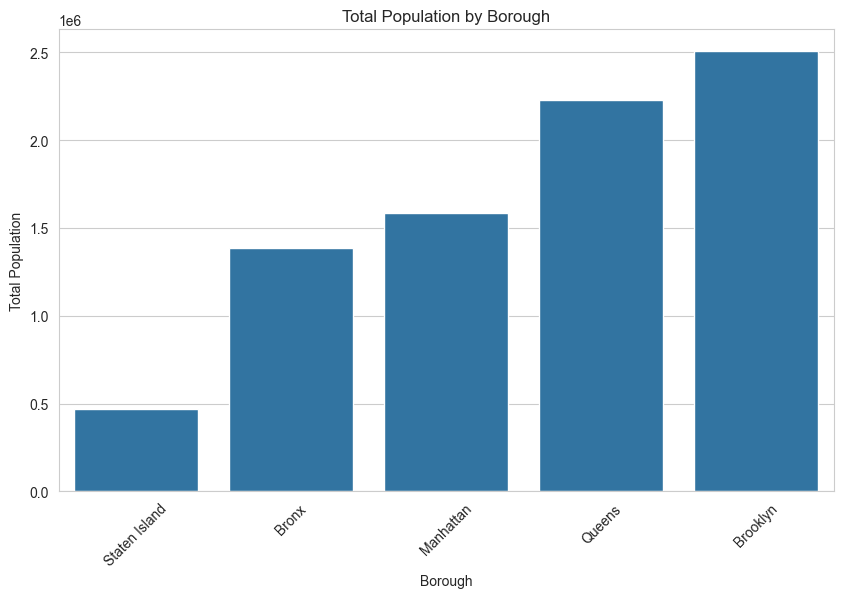

In [30]:
grouped =  ntas_db_pd.groupby('boro_name')['population'].sum().reset_index().sort_values(by = 'population', ascending=True)

# Crear un gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.barplot(data=grouped, x='boro_name', y='population')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

In [31]:
# Showing row with max shape_area
ntas_db_pd_sorted = ntas_db_pd.sort_values(by='shape_area', ascending=False)
ntas_db_pd_sorted.head(1)

,boro_name,name,shape_area,nta,population
141,Staten Island,New Springville-Bloomfield-Travis,3.271945e+08,SI05,39597


In [32]:
# Showing row with min shape_area
ntas_db_pd_sorted = ntas_db_pd.sort_values(by='shape_area', ascending=True)
ntas_db_pd_sorted.head(1)

,boro_name,name,shape_area,nta,population
73,Manhattan,Stuyvesant Town-Cooper Village,5.575563e+06,MN50,21049


In [57]:
grouped =  ntas_db_pd.groupby('nta')['population'].sum().reset_index()
grouped2 =  ntas_db_pd.groupby('nta')['shape_area'].sum().reset_index()

grouped_neigh = pd.merge(grouped, grouped2, on='nta') 
grouped_neigh

,nta,population,shape_area
0,BK09,22887,9.985083e+06
1,BK17,64518,6.335588e+07
2,BK19,35547,1.718066e+07
3,BK21,31965,3.876585e+07
4,BK23,17750,8.738769e+06
...,...,...,...
190,SI37,26453,4.643336e+07
191,SI45,21896,5.544820e+07
192,SI48,25238,5.041478e+07
193,SI54,40720,8.961114e+07


In [35]:
freq = pd.read_csv("Neigh_Freq.csv", delimiter=";")

In [36]:
freq = freq.rename(columns={"Neighbourhood" : "nta"})
freq.count()


Unnamed: 0        61
nta               61
Num. Incidents    61
dtype: int64

In [58]:
freq_neigh = pd.merge(freq, grouped_neigh, on='nta') 
freq_neigh = freq_neigh.drop(["Unnamed: 0"], axis = 1)
freq_neigh

,nta,Num. Incidents,population,shape_area
0,SI22,7083,33551,5.602857e+07
1,BK88,4296,106357,5.400495e+07
2,MN23,4186,66880,2.488638e+07
3,MN03,3706,75282,2.540303e+07
4,QN55,3338,75878,8.246139e+07
...,...,...,...,...
56,BK21,537,31965,3.876585e+07
57,BK46,462,20299,1.778210e+07
58,BK26,459,29436,3.132906e+07
59,MN99,100,1849,9.148280e+07


In [59]:
freq_neigh_pd = pd.DataFrame(freq_neigh)
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)

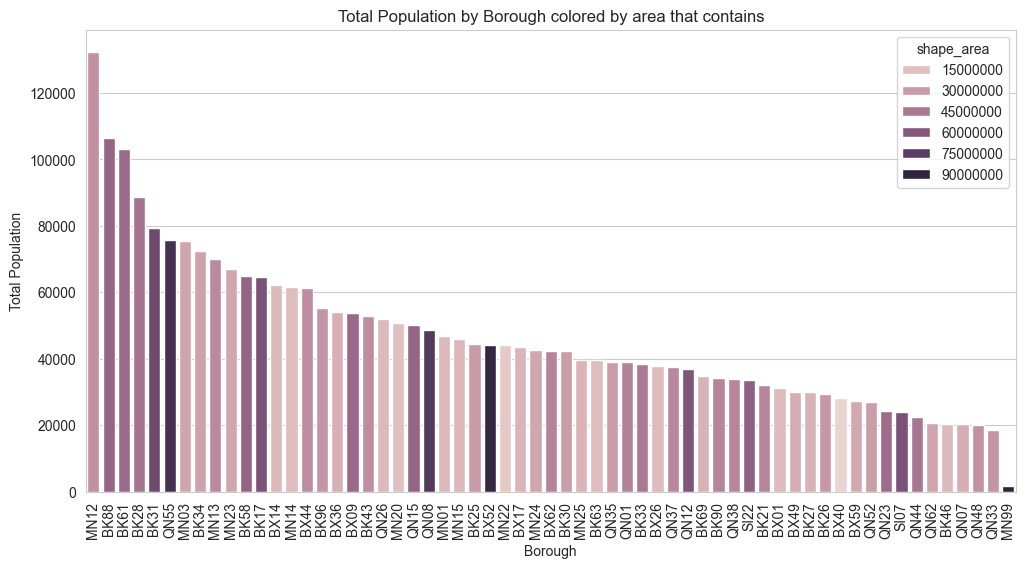

In [69]:
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=freq_neigh_pd, x='nta', y='population', hue='shape_area')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough colored by area that contains')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

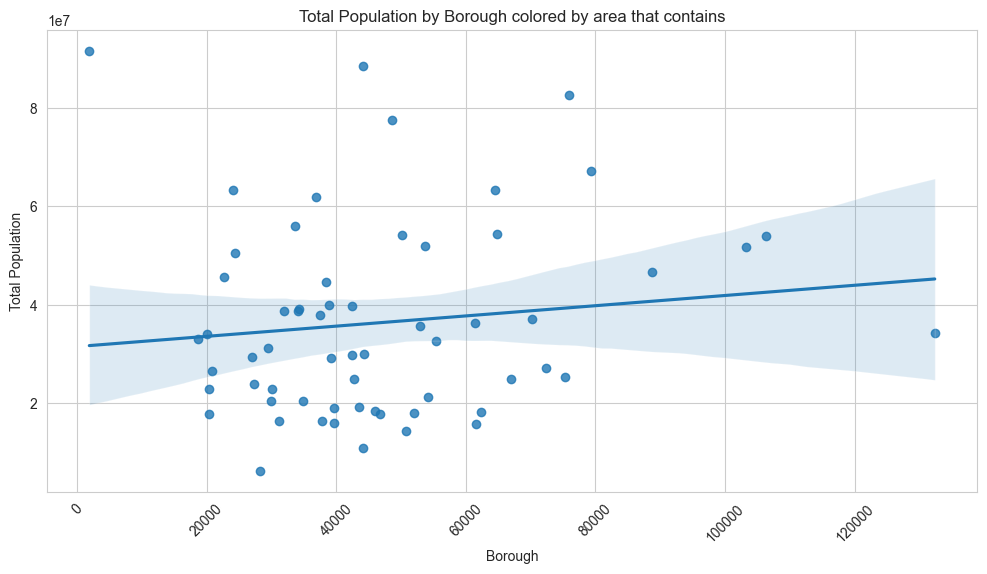

In [81]:
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.regplot(x=freq_neigh_pd['population'], y=freq_neigh_pd['shape_area'], scatter = True)
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough colored by area that contains')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

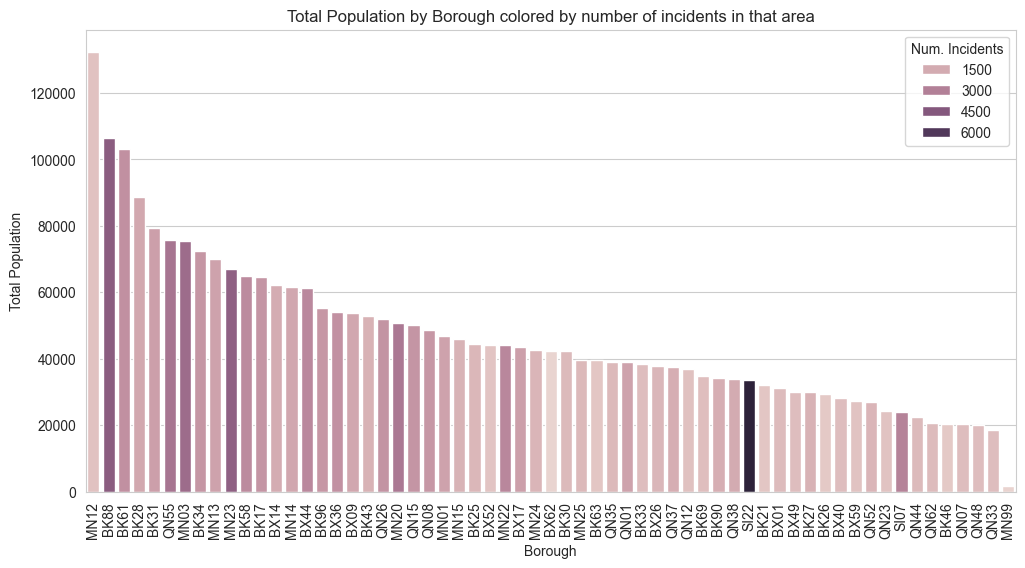

In [70]:
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=freq_neigh_pd, x='nta', y='population', hue='Num. Incidents')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough colored by number of incidents in that area')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


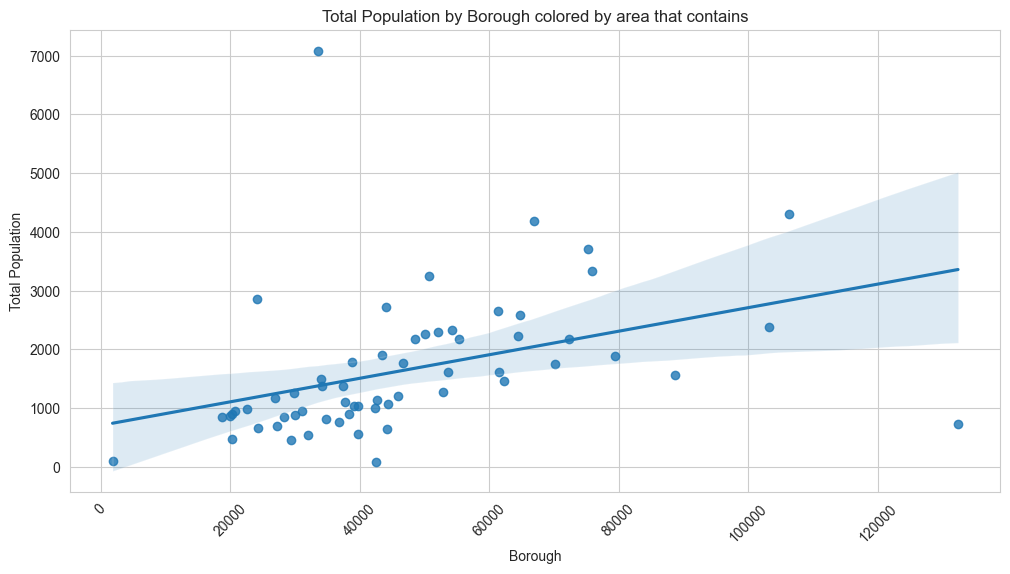

In [83]:
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.regplot(x=freq_neigh_pd['population'], y=freq_neigh_pd['Num. Incidents'], scatter = True)
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough colored by area that contains')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

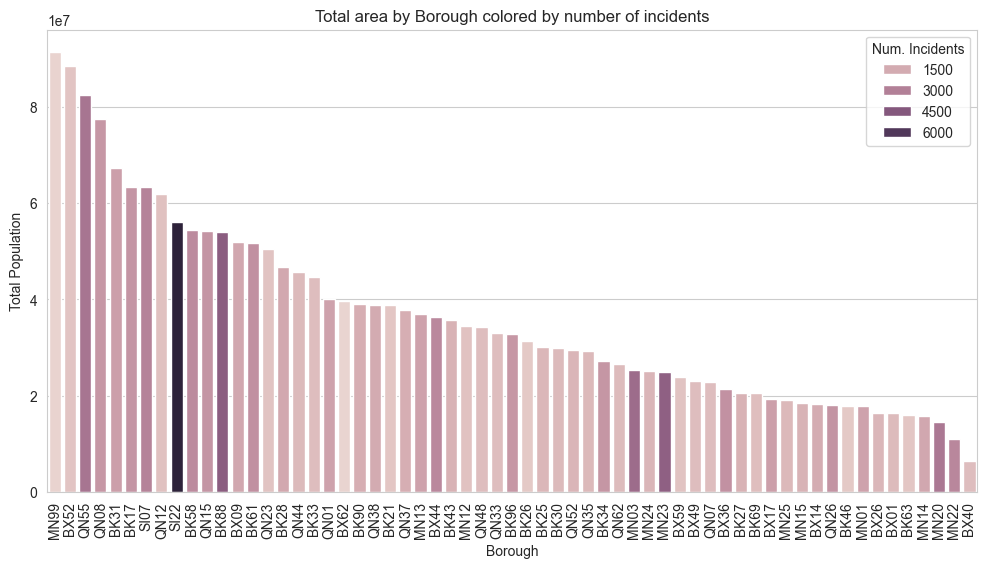

In [72]:
freq_neigh_pd = freq_neigh_pd.sort_values(by="shape_area", ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(data=freq_neigh_pd, x='nta', y='shape_area', hue='Num. Incidents')
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total area by Borough colored by number of incidents')
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()

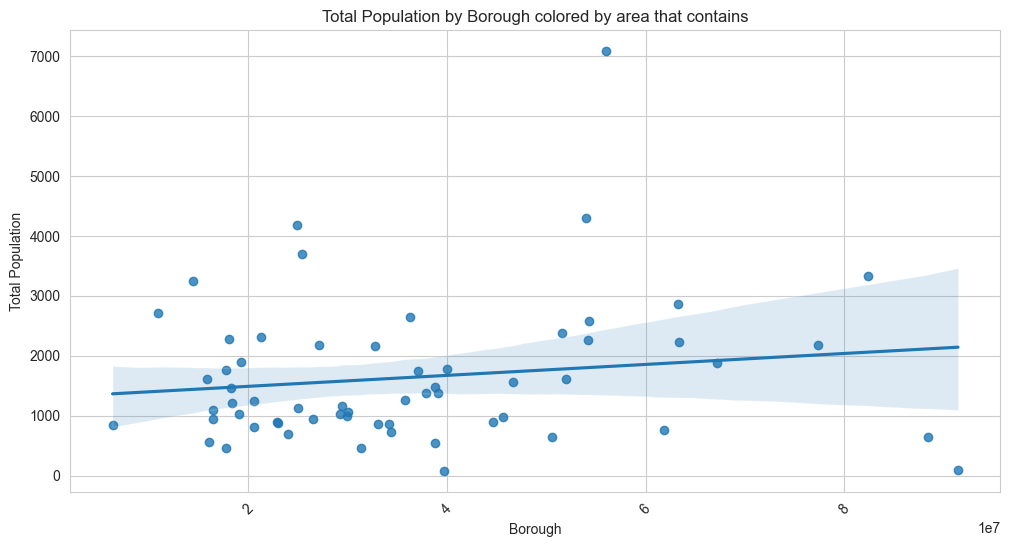

In [82]:
freq_neigh_pd = freq_neigh_pd.sort_values(by='population', ascending=False)
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.regplot(x=freq_neigh_pd['shape_area'], y=freq_neigh_pd['Num. Incidents'], scatter = True)
plt.xlabel('Borough')
plt.ylabel('Total Population')
plt.title('Total Population by Borough colored by area that contains')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# Distances from stations to neighbourhoods

In [129]:
response = requests.get("https://gitlab.com/drvicsana/cop-proyecto-2023/-/raw/main/project_data/distancias_estaciones_barrios.json")
distances_stations_ntas_db = json.loads(response.text)

In [130]:
distances_stations_ntas_db_pd = pd.DataFrame(distances_stations_ntas_db)
nta = list(distances_stations_ntas_db_pd.index)
distances_stations_ntas_db_pd.describe()

,42 South Street,49 Beekman Street,100 Duane Street,14 N. Moore Street,75 Canal Street,25 Pitt Street,222 East 2 Street,340 East 14 Street,253 Lafayette Street,42 Great Jones Street,...,256 Hylan Blvd.,278 McClean Avenue,1850 Clove Road,1592 Richmond Road,256 Nelson Ave.,345 Annadale Road,1560 Drumgoole Road West,7219 Amboy Road,1100 Rossville Ave,305 Front Street
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,1543.317538,1542.579846,1545.653897,1557.204256,1473.184205,1476.732205,1497.886308,1462.893590,1517.223436,1502.913795,...,2137.054718,2097.560410,2065.723026,2261.935590,2923.852821,2837.695128,2991.173897,3098.064000,2797.822564,2308.543282
std,535.168272,543.341805,543.641765,549.618642,534.374937,536.449978,540.472640,551.475531,539.766441,539.544224,...,827.934936,823.526339,831.424164,865.454817,909.948989,858.163490,836.077890,799.501847,797.883539,841.281592
min,131.780000,254.670000,140.070000,79.530000,129.550000,101.920000,243.760000,110.920000,197.490000,156.580000,...,228.170000,107.940000,178.050000,312.290000,115.290000,208.970000,147.960000,418.670000,153.050000,236.770000
25%,1149.405000,1148.020000,1144.990000,1153.575000,1114.990000,1120.680000,1141.975000,1119.775000,1188.820000,1157.860000,...,1468.535000,1416.085000,1405.605000,1612.290000,2436.950000,2447.500000,2687.715000,2801.195000,2479.980000,1642.515000
50%,1556.760000,1574.430000,1585.030000,1613.540000,1546.520000,1534.270000,1565.870000,1506.470000,1581.810000,1584.790000,...,2251.280000,2204.760000,2198.980000,2419.880000,3219.740000,3102.030000,3165.990000,3232.790000,2956.020000,2433.570000
75%,1919.370000,1926.635000,1929.265000,1934.570000,1817.180000,1812.905000,1836.890000,1800.475000,1846.410000,1851.435000,...,2813.805000,2772.075000,2760.235000,2978.560000,3599.360000,3398.990000,3557.405000,3664.640000,3349.675000,2992.250000
max,2924.900000,2955.340000,2929.850000,2898.250000,2721.930000,2793.210000,2849.560000,2879.040000,2855.610000,2835.290000,...,3663.830000,3628.090000,3616.690000,3832.430000,4221.770000,4248.540000,4410.110000,4448.060000,4207.630000,3846.120000


In [131]:
distances_stations_ntas_db_pd["nta"] = nta
means = distances_stations_ntas_db_pd.mean()

distances_stations_ntas_db_pd_means = distances_stations_ntas_db_pd.append(means, ignore_index=True)
distances_stations_ntas_db_pd_means = distances_stations_ntas_db_pd_means.rename({len(distances_stations_ntas_db_pd_means) - 1: 'Mean'})

distances_stations_ntas_db_pd_means

/var/folders/hy/yd6_7sgn5_x7955lmqt2tj7w0000gn/T/ipykernel_43172/1482448029.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  means = distances_stations_ntas_db_pd.mean()
/var/folders/hy/yd6_7sgn5_x7955lmqt2tj7w0000gn/T/ipykernel_43172/1482448029.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  distances_stations_ntas_db_pd_means = distances_stations_ntas_db_pd.append(means, ignore_index=True)


,42 South Street,49 Beekman Street,100 Duane Street,14 N. Moore Street,75 Canal Street,25 Pitt Street,222 East 2 Street,340 East 14 Street,253 Lafayette Street,42 Great Jones Street,...,278 McClean Avenue,1850 Clove Road,1592 Richmond Road,256 Nelson Ave.,345 Annadale Road,1560 Drumgoole Road West,7219 Amboy Road,1100 Rossville Ave,305 Front Street,nta
0,2123.180000,2130.200000,2104.710000,2073.110000,1896.780000,1881.480000,1925.060000,1876.57000,2030.470000,1974.100000,...,2393.86000,2396.740000,2617.64000,3444.350000,3471.110000,3761.950000,3933.270,3559.470000,2631.330000,QN08
1,1894.390000,1874.630000,1935.640000,2020.570000,1809.950000,1751.580000,1728.540000,1601.29000,1843.170000,1762.190000,...,3133.14000,3051.150000,3274.89000,3596.900000,3272.390000,3250.700000,3276.830,3037.710000,3351.180000,BX28
2,1872.670000,1776.720000,1811.350000,1821.870000,1646.270000,1630.970000,1674.550000,1626.81000,1779.960000,1724.340000,...,2058.18000,2061.060000,2281.96000,3108.670000,3135.430000,3426.270000,3597.590,3223.790000,2295.650000,QN55
3,1532.610000,1587.440000,1614.040000,1630.870000,1548.420000,1533.110000,1576.700000,1662.97000,1682.110000,1704.080000,...,1671.54000,1674.410000,1895.32000,2722.020000,2748.790000,3039.630000,3210.950,2837.150000,1909.010000,BK50
4,1774.190000,1754.430000,1815.430000,1900.370000,1689.740000,1631.380000,1608.330000,1481.08000,1722.970000,1641.990000,...,3012.94000,2893.910000,3117.65000,3439.670000,3115.160000,3093.460000,3119.590,2880.480000,3201.090000,BX41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,723.320000,730.330000,704.840000,673.240000,496.910000,481.610000,525.200000,611.46000,630.600000,652.570000,...,1750.57000,1744.320000,1960.06000,2799.280000,2813.530000,2988.500000,3097.890,2775.520000,1973.750000,BK73
192,446.340000,463.450000,452.350000,432.200000,240.240000,101.920000,243.760000,387.74000,406.880000,428.850000,...,1738.78000,1727.380000,1943.12000,2778.550000,2619.510000,2747.460000,2856.850,2534.480000,1956.810000,MN28
193,657.930000,767.280000,739.370000,756.190000,906.250000,1014.200000,1085.850000,1121.00000,902.060000,975.730000,...,1017.73000,1011.480000,1227.22000,2066.440000,2080.690000,2371.530000,2548.010,2174.210000,1240.910000,BK40
194,1512.500000,1567.330000,1593.940000,1610.760000,1601.230000,1648.580000,1692.170000,1778.44000,1689.700000,1728.940000,...,1405.49000,1408.360000,1629.27000,2455.970000,2482.740000,2773.570000,2944.890,2571.090000,1642.950000,BK99


In [152]:

distances_stations_ntas_db_pd_means = distances_stations_ntas_db_pd_means.sort_values(by = "Mean", axis = 1,ascending=False)
FivemostFar = distances_stations_ntas_db_pd_means.iloc[:-1,0:6]
#FivemostFar["nta"] = nta[:-2]
FivemostFar

,7219 Amboy Road,1560 Drumgoole Road West,256 Nelson Ave.,345 Annadale Road,1100 Rossville Ave,3067 Richmond Road
0,3933.27,3761.95,3444.35,3471.11,3559.47,2939.80
1,3276.83,3250.70,3596.90,3272.39,3037.71,3164.94
2,3597.59,3426.27,3108.67,3135.43,3223.79,2604.12
3,3210.95,3039.63,2722.02,2748.79,2837.15,2217.48
4,3119.59,3093.46,3439.67,3115.16,2880.48,3007.71
...,...,...,...,...,...,...
190,3243.13,3066.65,2756.10,2775.81,2869.33,2244.50
191,3097.89,2988.50,2799.28,2813.53,2775.52,2282.22
192,2856.85,2747.46,2778.55,2619.51,2534.48,2265.28
193,2548.01,2371.53,2066.44,2080.69,2174.21,1549.38


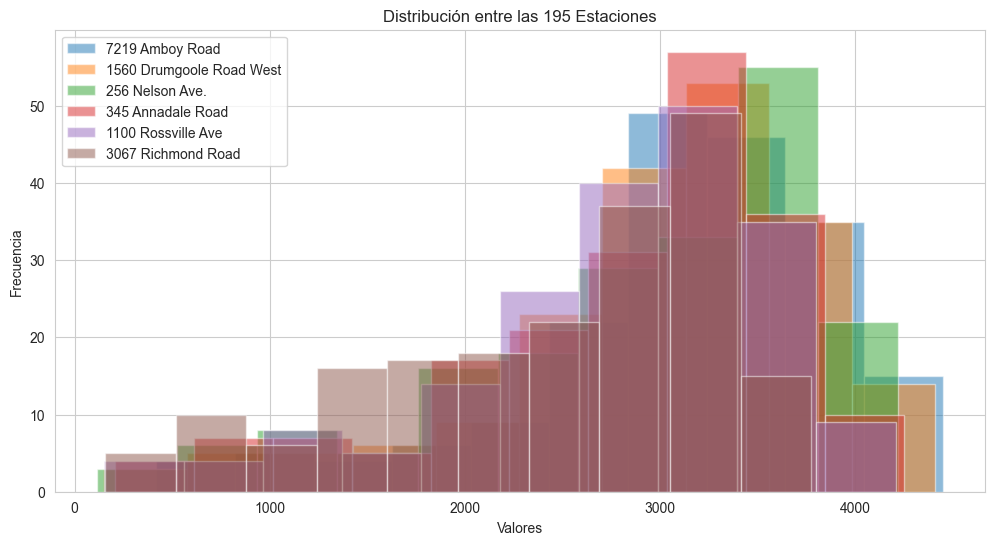

In [153]:
fig, ax = plt.subplots(figsize=(12, 6))

for station, values in FivemostFar.items():
    plt.hist(values, bins=10, alpha=0.5, label=station)

plt.title('Distribución entre las 195 Estaciones')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

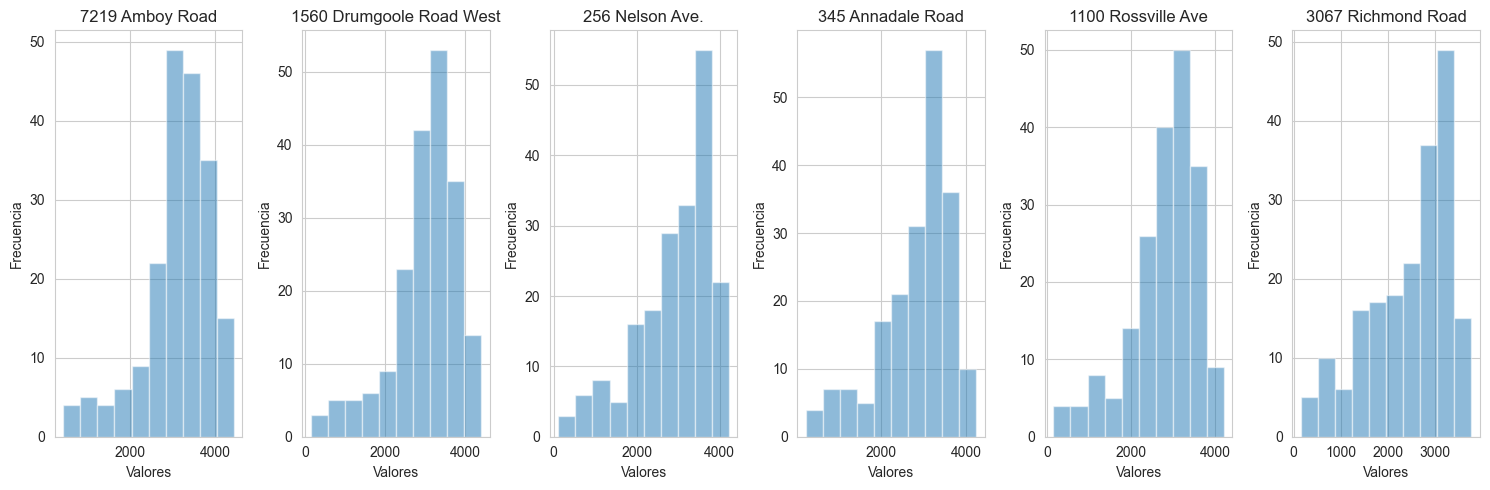

In [158]:
columnas = FivemostFar.columns
fig, axs = plt.subplots(1, len(columnas), figsize=(15, 5))

for i, columna in enumerate(columnas):
    axs[i].hist(FivemostFar[columna], bins=10, alpha=0.5)
    axs[i].set_title(columna)
    axs[i].set_xlabel('Valores')
    axs[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()